# Lab 5 Face Recognition

In this lab exercise, you will look at the idea behind face recognition using a dimensionality
reduction method called PCA. You are asked to write a short (no more than 2 pages) report of
your work, answering specific questions, and showing example images. This work is not assessed
(it will not count towards your module mark) but you will get formative feedback.

### Task 1

Work through the script that has comments to explain all the steps

Faces shape: (86,)
Faces 2D shape: (86, 3000)
(3000, 3000)
(86, 3000)
(3000,) (3000, 3000)


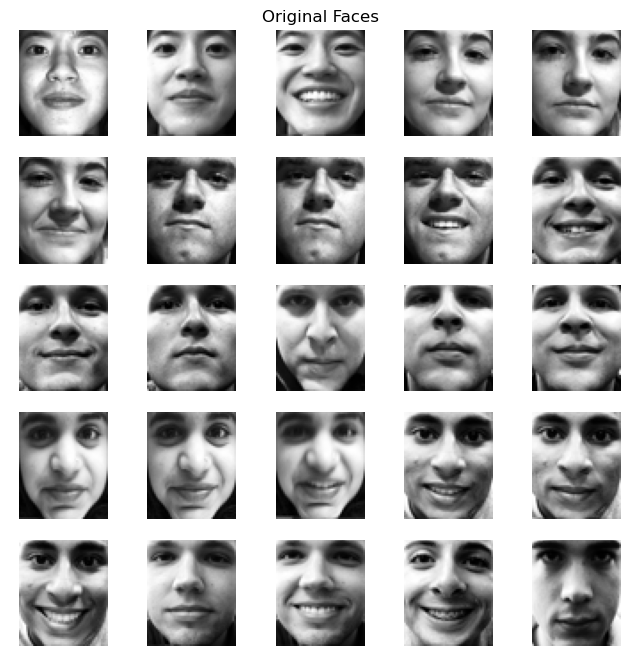

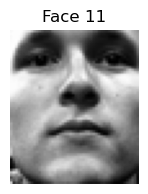

In [81]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

# This script will help you understand how face recognistion works by the
# use of linear dimensionality reduction through the use of PCA

# First, let us read all the images and plot a few of them
# Note that raw_images is a cell variable with 86 images (2-4 images of multiple people)
faces = scipy.io.loadmat("raw_images.mat")["raw_images"][0]

fig = plt.figure(figsize=(8, 8))
plt.title("Original Faces")
plt.axis('off')
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(faces[i], cmap='gray')

print("Faces shape:",faces.shape)

shape = (faces[0].shape[1],faces[0].shape[0])

# Convert data to 2-D matrix, one row per image
# This means we now have a 2D array, each row an image (an observation) and each column being a data point (pixel value)
faces_2d = []
for face in faces:
    faces_2d.append(np.reshape(face,(faces[i].shape[0]*faces[i].shape[1])))
faces_2d = np.array(faces_2d)

print("Faces 2D shape:",faces_2d.shape)

# Eigen Vectors (also known as eigenfaces)
# next we will go through each step of calculating the PCA
# note the variable images, has 86 observations, with 3000 points each and
# to view, for example observation 11, we can say

fig = plt.figure(figsize=(2, 2))
plt.title("Face 11")
plt.axis('off')
plt.imshow(np.reshape(faces_2d[11],(faces[i].shape[0],faces[i].shape[1])), cmap='gray')
# Typically you would subtract the mean of each observation, then form the
# covariance matrix and then caluclate the Principal components, but our
# data space is large 3000 points so a big computational problem.
# We would normally do the following, but for higher resolution we need to
# think differently! Can you think how?
# Step 1: Calculate co-variance
mean = np.mean(faces_2d,axis=1)
mean = np.repeat(mean,faces_2d.shape[1]).reshape(faces_2d.shape)
r = faces_2d - mean
conv_x = np.matmul(r.transpose(), r)#.transpose()
print(conv_x.shape)
print(mean.shape)

#Get Eigenvalues and Eigenvectors 
w,v = np.linalg.eig(conv_x)
print(w.shape,v.shape)
eig  = np.diag(v)

sorted_idxs = np.argsort(eig) # returns the indexes that would sort the array



(3000,)
(3000, 3000)


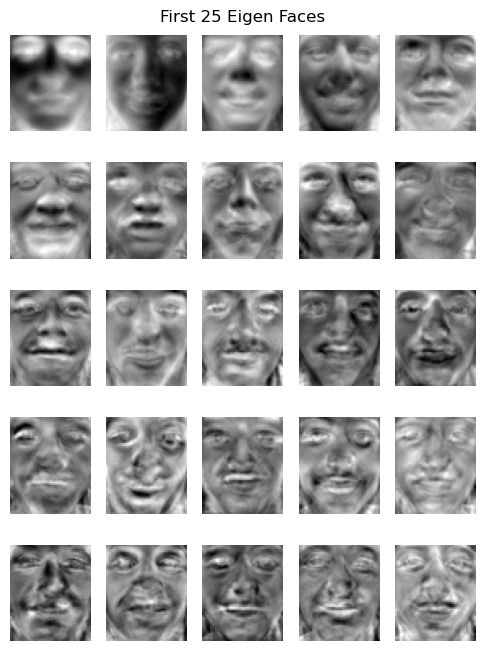

In [82]:
eigen_values = eig[sorted_idxs]
eigen_vectors = v.transpose().real #(v.transpose()[sorted_idxs])

print(eigen_values.shape)
print(eigen_vectors.shape)

# plot the first 6 PCs
fig = plt.figure(figsize=(6, 8))
plt.title("First 25 Eigen Faces")
plt.axis('off')
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(eigen_vectors[i],(faces[0].shape[0],faces[0].shape[1])), cmap='gray')

Text(0.5, 1.0, 'Face 61, Using only the first 50 eigenVectors')

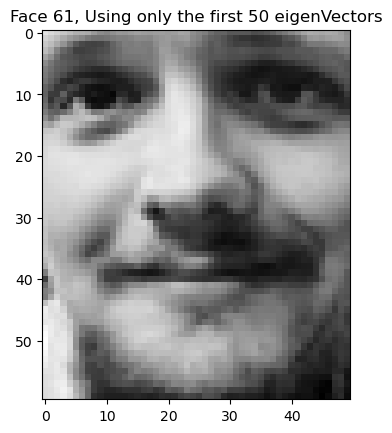

In [76]:
# each row is the weight (reduced dimension) of each original image so for each face, we can calculate the weight w.

V = eigen_vectors.transpose()
w = np.matmul(faces_2d,V)

# Now recover original data but only use for example 50 Dimensions, that is the first 50 EigenVectors
w1 = w
w1[:,50:] = 0
image_2d =  np.matmul(V,w1[61])
image = np.reshape(image_2d.transpose(),(shape[1],shape[0]))
plt.imshow(image, cmap='gray')
plt.title("Face 61, Using only the first 50 eigenVectors")

#### Question 1: When we need to calculate PCA for higher resolution we need to think differently on how to improve computational speed! How can we achieve this?

#### Question 2: When you look at each PC, in order of importance, what do you see?

#### Question 3: As you decrease the number of PCs used for face reconstruction, what do you observe?

#### Question 4: Based on the lecture notes, modify the algorithm to allow face recognition.